In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
session_data = pd.read_csv("all_apps_wide-2022-06-21.csv")
session_data.columns= session_data.columns.str.replace('.','_',regex=True)
session_data.columns= session_data.columns.str.replace('cpr_defaults_1_','',regex=True)
session_data

participant_id_in_session participant_code  participant_label  \
0                           1         8pk9epyu                NaN   
1                           2         i73uvmxp                NaN   
2                           3         pq6crjyl                NaN   
3                           4         hr4u7ln9                NaN   
4                           5         bl0z8d8f                NaN   
5                           6         txcn90cw                NaN   
6                           7         d9zx6byq                NaN   
7                           8         w2xxvhox                NaN   
8                           9         p26ylshk                NaN   
9                          10         j0lw55zj                NaN   
10                         11         96t340yg                NaN   
11                         12         6wojkhyq                NaN   
12                         13         cxxyokpf                NaN   
13                         14         bwrr8ddk                NaN   
14                         15         qivxgn9e                NaN   
15                         16         re46j1y5                NaN   

    participant__is_bot  participant__index_in_pages  \
0                     0                            8   
1                     0                            8   
2                     0                            8   
3                     0                            8   
4                     0                            8   
5                     0                            8   
6                     0                            8   
7                     0                            8   
8                     0                            8   
9                     0                            8   
10                    0                            8   
11                    0                            8   
12                    0                            9   
13                    0                            8   
14                    0                            8   
15                    0                            8   

    participant__max_page_index participant__current_app_name  \
0                             9                  cpr_defaults   
1                             9                  cpr_defaults   
2                             9                  cpr_defaults   
3                             9                  cpr_defaults   
4                             9                  cpr_defaults   
5                             9                  cpr_defaults   
6                             9                  cpr_defaults   
7                             9                  cpr_defaults   
8                             9                  cpr_defaults   
9                             9                  cpr_defaults   
10                            9                  cpr_defaults   
11                            9                  cpr_defaults   
12                            9                  cpr_defaults   
13                            9                  cpr_defaults   
14                            9                  cpr_defaults   
15                            9                  cpr_defaults   

   participant__current_page_name participant_time_started_utc  \
0                         Results   2022-06-21 13:51:02.880149   
1                         Results   2022-06-21 13:51:03.030034   
2                         Results   2022-06-21 13:51:03.070754   
3                         Results   2022-06-21 13:51:03.079456   
4                         Results   2022-06-21 13:51:03.097287   
5                         Results   2022-06-21 13:51:03.253430   
6                         Results   2022-06-21 13:51:03.175500   
7                         Results   2022-06-21 13:51:03.243862   
8                         Results   2022-06-21 13:51:03.212519   
9                         Results   2022-06-21 13:51:03.324370   
10                        Results   2022-06-2

In [27]:
session_data.columns

Index(['participant_id_in_session', 'participant_code', 'participant_label',
       'participant__is_bot', 'participant__index_in_pages',
       'participant__max_page_index', 'participant__current_app_name',
       'participant__current_page_name', 'participant_time_started_utc',
       'participant_visited', 'participant_mturk_worker_id',
       'participant_mturk_assignment_id', 'participant_payoff', 'session_code',
       'session_label', 'session_mturk_HITId', 'session_mturk_HITGroupId',
       'session_comment', 'session_is_demo',
       'session_config_participation_fee', 'session_config_default_extraction',
       'session_config_name', 'session_config_real_world_currency_per_point',
       'player_id_in_group', 'player_role', 'player_payoff', 'player_age',
       'player_gender', 'player_answer1', 'player_answer2', 'player_answer3',
       'player_extraction', 'player_you1', 'player_you2', 'player_you3',
       'player_you4', 'player_you5', 'player_you6', 'player_other1',
    

In [23]:
player_data = pd.read_csv("cpr_defaults_player.csv")
player_data = player_data.loc[player_data.session_id == 6]

In [29]:
session_data[["participant_code", "player_payoff"]]

participant_code  player_payoff
0          8pk9epyu          80.30
1          i73uvmxp         342.80
2          pq6crjyl         114.20
3          hr4u7ln9         244.00
4          bl0z8d8f         187.20
5          txcn90cw          89.55
6          d9zx6byq         277.00
7          w2xxvhox         241.30
8          p26ylshk         198.80
9          j0lw55zj          80.30
10         96t340yg         235.50
11         6wojkhyq         296.80
12         cxxyokpf         194.30
13         bwrr8ddk         188.30
14         qivxgn9e         217.05
15         re46j1y5         187.50

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
Name: player_age, dtype: float64

In [75]:
tickets = []
for p in data.player_internal_id.unique():
    payoff = data.loc[data.player_internal_id == p, "player_payoff"].item()
    tickets.extend([p] * int(payoff))

for i in range(0, 3):
    pick = int(np.random.choice(tickets, 1, replace = False))
    tickets = list(filter(lambda x: x != pick, tickets))
    display (pick)

41

46

36

In [13]:
data.extraction.mean()

11.25

In [62]:
session_data.player_extraction

1     20
2      5
3     11
4     10
5      5
6     18
7     18
8     11
10    11
11    18
12    16
13    10
14    17
15    10
Name: player_extraction, dtype: int64

In [60]:
session_data = session_data.loc[session_data.player_extraction > 0]

Text(0.5, 0, 'Changed default')

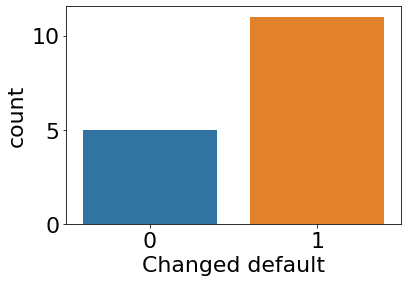

In [61]:
plt.rcParams.update({'font.size': 22})
ax = sns.countplot(x="player_changed_default", data=data)
plt.xlabel("Changed default")

In [57]:
session_data["changed_default_label"] = "Kept default"
session_data.loc[session_data.player_changed_default == 1, "changed_default_label"] = "Changed default"


Text(0, 0.5, 'Extraction')

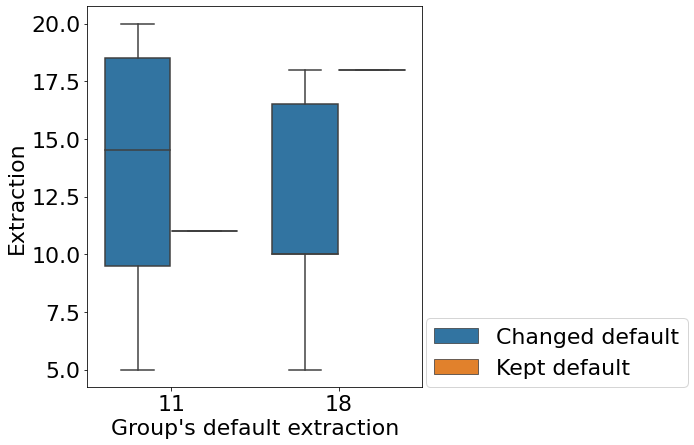

In [65]:
plt.figure(figsize = (6,7))
ax = sns.boxplot(x="group_default_extraction", y="player_extraction", hue = "changed_default_label", data=session_data)
plt.legend(loc = (1.01,0))
plt.xlabel("Group's default extraction")
plt.ylabel("Extraction")

In [40]:
session_data.groupby(["group_default_extraction", "player_changed_default"]).participant_code.count()

group_default_extraction  player_changed_default
11                        0                         4
                          1                         4
18                        0                         1
                          1                         7
Name: participant_code, dtype: int64

In [42]:
session_data.loc[(session_data.group_default_extraction == 18) & (session_data.player_changed_default == 1), "player_extraction"]

4     10
5      5
6     18
12    16
13    10
14    17
15    10
Name: player_extraction, dtype: int64

In [63]:
session_data.loc[(session_data.group_default_extraction == 11) & (session_data.player_changed_default == 0), "player_extraction"]

3    11
8    11
Name: player_extraction, dtype: int64